# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname: Santagata
Student name: Luca
    
ID: 10657643

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 10657643
np.random.seed(ID)

In [4]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [71 57 55 67 53 75 57 50 51 64]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


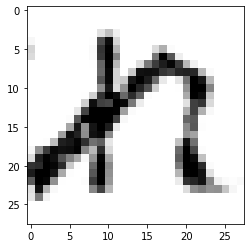

LABEL: 8
INPUT:


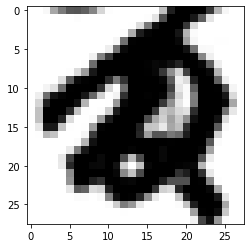

LABEL: 6
INPUT:


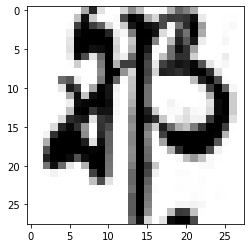

LABEL: 4
INPUT:


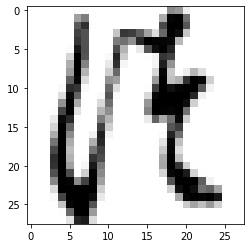

LABEL: 3


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM C
parameters =  {"C": [0.01, 0.1, 1, 10]}

    
#train linear SVM

grid = GridSearchCV(SVC(kernel = "linear"),parameters, cv=4)
grid.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:")
print(grid.best_params_)
print("\n")

print("Score with best parameters:")
print(grid.best_score_)
print("\n")

print("All scores on the grid:")
print(grid.cv_results_["mean_test_score"])
print("\n")

RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 0.01}


Score with best parameters:
0.7683333333333333


All scores on the grid:
[0.76833333 0.76833333 0.76833333 0.76833333]




## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel
grid = GridSearchCV(SVC(kernel = "poly",degree=2), parameters, cv=4)

grid.fit(X_train, y_train)


print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
print(grid.best_params_)
print("\n")

print("Score with best parameters:")
print(grid.best_score_)
print("\n")

print("All scores on the grid:")
print(grid.cv_results_["mean_test_score"])
print("\n")

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 0.01, 'gamma': 1}


Score with best parameters:
0.79


All scores on the grid:
[0.125      0.77333333 0.79       0.45166667 0.79       0.79
 0.77333333 0.79       0.79      ]




## TO DO 3  see also at the and of this notebook for an implementation of 3 degree polynomial kernel with more training samples

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of higher degree kernel
degree = 3

grid = GridSearchCV(SVC(kernel = "poly", degree=3), parameters, cv=4)
grid.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found:")
print(grid.best_params_)
print("\n")

print("Score with best parameters:")
print(grid.best_score_)
print("\n")

print("All scores on the grid:")
print(grid.cv_results_["mean_test_score"])
print("\n")

RESULTS FOR POLY DEGREE= 3  KERNEL
Best parameters set found:
{'C': 0.01, 'gamma': 0.1}


Score with best parameters:
0.7416666666666667


All scores on the grid:
[0.125      0.74166667 0.73666667 0.34       0.73666667 0.73666667
 0.72       0.73666667 0.73666667]




## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel
grid = GridSearchCV(SVC(kernel = "rbf"), parameters, cv=4)
grid.fit(X_train, y_train)


print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:")
print(grid.best_params_)
print("\n")

print("Score with best parameters:")
print(grid.best_score_)
print("\n")

print("All scores on the grid:")
print(grid.cv_results_["mean_test_score"])
print("\n")

RESULTS FOR rbf KERNEL
Best parameters set found:
{'C': 10, 'gamma': 0.01}


Score with best parameters:
0.8383333333333333


All scores on the grid:
[0.125      0.17       0.125      0.125      0.64333333 0.81833333
 0.14166667 0.125      0.78666667 0.83833333 0.15       0.125
 0.78833333 0.83833333 0.15       0.125     ]




## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

Considering that the $\gamma$ parameter determines the scale  of what it means for points to be close togheter, whereas The $C$ parameter limits the importance of each point, I have noticed that:

LINEAR KERNEL: The scores aren't affected by the value of $C$ parameter. They are always the same;

POLINOMIAL KERNEL:
In this case, the model depends on the parameters. 
The worst results are obtained with the lowest combined values of the $C$ and $\gamma$ value.
Looking at the score with best parameters, the polinomial kernel of degree 2 performs better than the other one with degree 3 
(Using 600 samples the polynomial kernel of degree 3 doesn't result better if compared to the other of degree 2. But If I increase the number of training samples, I obtain that degree 3 is much better than degree 2. I have done this in the last part of the notebook, with 6000 training samples).
Using 600 training samples the best result obtained with the polinomial kernel of degree 2 is better than the one obtained with linear kernel. 
 

RBF KERNEL: 
As I expected, this kernel returns the best score. The best parameters are $C = 10$ and gammma = $\gamma = 0.01$
The small $\gamma$ means a large radius for the Gaussian kernel, wich means that many points are considered close by. 
The bigger value of $C$ allows the misclassified points to have a stronger influence on the model, and makes the decison boundary bend to correcly classify them


 






## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(kernel = "rbf", C=10, gamma = 0.01) 
best_SVM.fit(X_train, y_train)

training_error = 1 - best_SVM.score(X_train, y_train)
test_error = 1 - best_SVM.score(X_test, y_test)

#(error is 1 - svm.score)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.167250


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [13]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


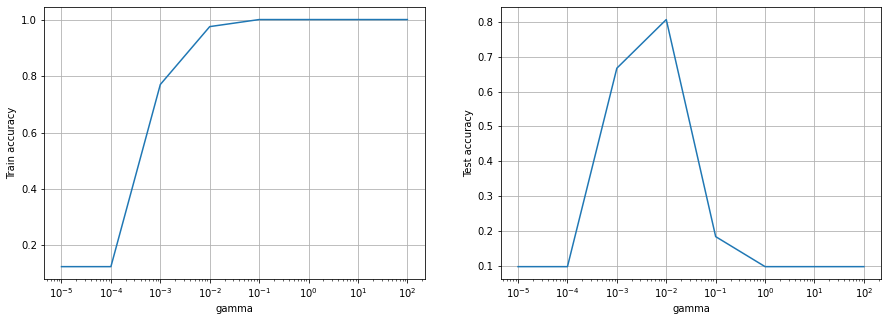

In [14]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

    
# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS
for gamma in gamma_values:
    model = SVC(kernel = "rbf", C=1, gamma=gamma)
    model.fit(X_train, y_train)
    train_acc_list.append(model.score(X_train, y_train))
    test_acc_list.append(model.score(X_test, y_test))
    
    

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

It's possiblo to notice that the best value of $\gamma$ is of the order of $10^{-2}$. Whit this parameter the train accuracy is $\sim 100\% $, and the test accuracy is $\sim 80\% $.

If the value of $\gamma$ is of the order less than $10^{-4}$ the model doesn't learn, with bad scores on both training and test accuracy.

The most interesting aspect is for the values of $\gamma$ of the order bigger than $10^{-2}$: in this case there is 
clearly an example of overfitting. Increasing $\gamma$ the train accuracy reaches the $100\%$, whereas the test accuracy goes to $10\%$. This means that the model has memorized all the training data., but unfortunately cannot perform accurately against test data.

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [195 173 185 208 211 185 214 204 214 211]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [16]:
#get training and test error for the best SVM model from CV

best_SVM = SVC(kernel = "rbf", C=10, gamma = 0.01) 
best_SVM.fit(X_train, y_train)

training_error = 1 - best_SVM.score(X_train, y_train)
test_error = 1 -best_SVM.score(X_test, y_test)


print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.114586


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large large C)¶

In [17]:
from sklearn import linear_model

model = linear_model.LogisticRegression(C = 10**15)
model.fit(X_train, y_train)

training_error_no_regularization = 1 - model.score(X_train, y_train)
test_error_no_regularization = 1 - model.score(X_test, y_test)


print ("Best logistic regression training error: %f" % training_error_no_regularization)
print ("Best logistic regression test error: %f" % test_error_no_regularization)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.275983


## TO DO 9 Try  with regularization (use C=1)¶

In [18]:
model = linear_model.LogisticRegression(C = 1, max_iter=500)
model.fit(X_train, y_train)

training_error_regularized = 1 - model.score(X_train, y_train)
test_error_regularized = 1 - model.score(X_test, y_test)


print ("Best regularized logistic regression training error: %f" % training_error_regularized)
print ("Best regularized logistic regression test error: %f" % test_error_regularized)

Best regularized logistic regression training error: 0.001000
Best regularized logistic regression test error: 0.246948


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.

For this comparison I have used the SVM model with the RBF Kernel, $C=10$ and $\gamma=0.01$ (Whit this parameters I have obtained the best score).
There isn't any difference on the training error (both are $0\%$), but the model trained with 2000 data points returns a better test error ($\sim 11\%$) than the one obtained with model trained with 600 samples (($\sim 17\%$).


- the results of SVM and of Logistic Regression

For the Logistic Regression I have taken in consideration the value of $C = 1$.
Both the model have achieved a training error of $0\%$, but looking at the test error we can confirm that the SVM model (test error $\sim 11\%$) is much better than the LR model (test error $\sim 27\%$)

## TO DO 10
Plot a letter that is missclassified by logistic regression and correctly classified by SVM.

I have also plotted an histogram of number of misclassified examples for each target, so that to compare the performances of the two models.

In [19]:
LR_prediction = model.predict(X_test)
SVM_prediction = best_SVM.predict(X_test)

print(LR_prediction)
print(SVM_prediction)

LR_misclassified = []
SVM_misclassified = []

for i in range(len(SVM_prediction)):
    if SVM_prediction[i]!= y_test[i]:
        SVM_misclassified.append(SVM_prediction[i])
       
    
for i in range(len(LR_prediction)):
    if LR_prediction[i]!= y_test[i]:
        LR_misclassified.append(LR_prediction[i])
       

[7 8 1 ... 4 2 4]
[7 8 1 ... 9 2 4]


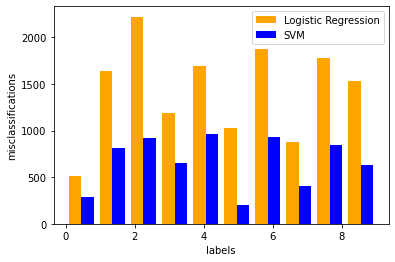

In [20]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')



plt.hist([LR_misclassified, SVM_misclassified], label=['Logistic Regression', 'SVM'], color= ["orange","blue"])
plt.xlabel("labels")
plt.ylabel("misclassifications")
plt.legend(loc='best')
plt.show()


As mentioned before, It's clear that the SVM model is much better than the LR model, in fact, for each label, the LR model returns a bigger number of misclassified examples.

Here I have plotted  a letter that has been missclassified by logistic regression and correctly classified by SVM.

INPUT:


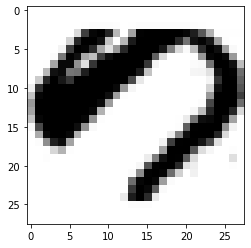

LABEL: 3
Wrong LR prediction 7
Right SVM prediction 3


In [21]:
for i in range(len(y_test)):
    if(SVM_prediction[i] == y_test[i] and LR_prediction[i] != y_test[i]):
        plot_input(X_test, y_test, i)
        print("Wrong LR prediction", LR_prediction[i])
        print("Right SVM prediction", SVM_prediction[i])
        break
        
        

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = confusion_matrix(y_test, SVM_prediction)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR = confusion_matrix(y_test, LR_prediction)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5805 5827 5815 5792 5789 5815 5786 5796 5786 5789]

 Confusion matrix SVM  
 
 [[5263    3    2   35  147   50   10  170   89   36]
 [  21 4970   80   73  166    8  147    6  147  209]
 [   0  142 4755  124   68   25  361   17  218  105]
 [   6   60   91 5390   51   37   32   22   79   24]
 [ 149  114  136   48 5006   13   89   41   82  111]
 [  49   88  116  153   48 5145   62   30   96   28]
 [   8  147  245   34  187    7 5008   89   36   25]
 [  24   15   47   80  165    9   38 5326   42   50]
 [  20  137   67   90   24   45  172   10 5175   46]
 [  14  104  141   16  107    5   17   15   54 5316]]

 Confusion matrix SVM (normalized)   
 
 [[0.91 0.   0.   0.01 0.03 0.01 0.   0.03 0.02 0.01]
 [0.   0.85 0.01 0.01 0.03 0.   0.03 0.   0.03 0.04]
 [0.   0.02 0.82 0.02 0.01 0.   0.06 0.   0.04 0.02]
 [0.   0.01 0.02 0.93 0.01 0.01 0.01 0.   0.01 0.  ]
 [0.03 0.02 0.02 0.01 0.86 0.   0.02 0.01 0.01 0.02]
 [0.01 0.02 0.02 0.03 0.01 0.88 0.01 0.01 0.0

In [23]:
# ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX


I also have plotted a "colorized" version of the confusion matrix, that shows clearer the performance of the model. 

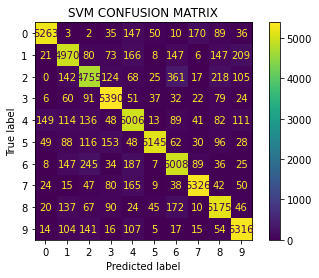

In [24]:
plot_confusion_matrix(best_SVM, X_test, y_test)
plt.title("SVM CONFUSION MATRIX")
plt.show()

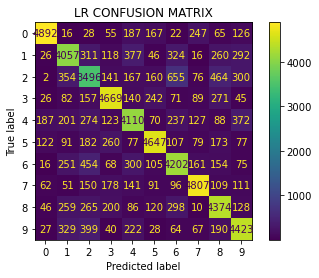

In [25]:
plot_confusion_matrix(model, X_test, y_test)
plt.title("LR CONFUSION MATRIX")
plt.show()

## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.


It's easy to notice that both models performs better on some classes, and worse on others, for example:

The SVM model has never misclassifed the CLASS $2$ as the CLASS $0$ (Insted, on these same example, the LR model has misclassified $2$ times)

The SVM model $8$ times has classifed the CLASS $6$ as the CLASS $0$ (Insted, on these same example, the LR model has misclassified $16$ times)


The SVM model $209$ times has classifed the CLASS $1$ as the CLASS $9$ (On these same example the LR model has misclassified $209$ times)

The SVM model $245$ times has classifed the CLASS $6$ as the CLASS $2$ (On these same example the LR model has misclassified $454$ times)


Mybe the images related to this two last samples are very similar, or maybe they are too much complicated for the SVM model (a better solution could be obtained with a Convolutional Neural Network)

### Here I have implemented a 3 degree polynomial kernel with more training samples. 

In [26]:
m_training = 6000
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]


# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of higher degree kernel
degree = 3

grid = GridSearchCV(SVC(kernel = "poly", degree=3), parameters, cv=4)
grid.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found:")
print(grid.best_params_)
print("\n")

print("Score with best parameters:")
print(grid.best_score_)
print("\n")

print("All scores on the grid:")
print(grid.cv_results_["mean_test_score"])
print("\n")

RESULTS FOR POLY DEGREE= 3  KERNEL
Best parameters set found:
{'C': 0.01, 'gamma': 0.1}


Score with best parameters:
0.8791666666666668


All scores on the grid:
[0.47 0.88 0.87 0.79 0.87 0.87 0.87 0.87 0.87]


